In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import re
import random
import csv

/home/ziyi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Network Parameters
num_input = 6
timesteps = 80 # timesteps
num_hidden = 100 # hidden layer num of features
num_output= 1

In [22]:
def read_sensor(filename):
    with open(filename, "r") as csvfile:
        reader = csv.reader(csvfile)
        dataset = [row[17:23] for row in reader]
        #data_x
        return np.array(dataset)
    
def read_xml(filename, length):
    f = open(filename)
    cts = f.read()
    f.close()

    p_foot = re.compile(r'<WhichFoot>(.*?)</WhichFoot>')
    all_foot = p_foot.findall(cts)

    p_time = re.compile(r'<Time>(.*?)</Time>')
    all_time = p_time.findall(cts)

    strike_times = []
    #L-1 R-0
    strike_times.append([0.0, 0.5])
    for i in range(len(all_foot)):
        if(all_foot[i]=='L'):
            strike_times.append([float(all_time[i]), 1])
        else:
            strike_times.append([float(all_time[i]), 0])
    strike_times[-1][1] = 0.5
    strike_times.append([length/25.0, 0.5])

    window_y = []
    strike_index=0
    for i in range(length):
        if(i/25.0 >= strike_times[strike_index+1][0]):
            strike_index += 1
        window_y.append([strike_times[strike_index][1]])

    p_info = re.compile(r'<StartTime>(.*?)</StartTime>\n\t<EndTime>(.*?)</EndTime>\n\t<NSteps>(.*?)</NSteps>\n\t<Direction>(.*?)</Direction>')
    all_info = p_info.findall(cts)#start_time, end_time, step_num, direction

    for i in range(len(all_info)):
        if(all_info[i][3][:4]=='Turn'):
#             print(all_info[i])
            start_time = int(float(all_info[i][0])*25)
            end_time = int(float(all_info[i][1])*25)
#             print('start and end time : ', all_info[i][0], all_info[i][1])
            for t in range(start_time-1, end_time):
                window_y[t] = [0.5]

#     print(len(window_y))  
    return window_y

def add_data(path, person, phone_location, assistant):
    data_x = read_sensor('weallwalk/sensor/iPhoneSensors_T'+str(path)+'_ID'+str(person)+'_'+phone_location+'_'+assistant+'.csv')
    data_y = read_xml('weallwalk/xml/T'+str(path)+'_ID'+str(person)+'_'+assistant+'.xml', len(data_x))
    
    split_x, split_x_part = [], []
    split_y, split_y_part = [], []
    for i in range(len(data_y)):
        if(data_y[i][0]!=0.5):
            split_y_part.append(data_y[i])
            split_x_part.append(data_x[i])
        else:
            if(len(split_y_part)>0):
                split_y.append(split_y_part)
                split_x.append(split_x_part)
                split_y_part = []
                split_x_part = []
    
    data_x_seq, data_y_seq = [], []
    for i in range(len(split_x)):
        data_x_part, data_y_part = [], []
        for j in range(len(split_x[i])-timesteps):
            x = split_x[i][j:j+timesteps]
            y = split_y[i][j+timesteps]
            data_x_part.append(x)
            data_y_part.append(y)
        data_x_seq.append(data_x_part)
        data_y_seq.append(data_y_part)
    
    return data_x_seq, data_y_seq

In [24]:
data_x_seq, data_y_seq = add_data(1, 1, '1L', 'GD')
print(len(data_y_seq))
print([len(i) for i in data_y_seq])
print(sum([len(i) for i in data_y_seq]))
# print(data_y_seq)

4
[71, 134, 927, 73]
1205


In [26]:
step_data_list = []
for i in range(1,6):
#     step_data_list.append([i, 1, '1L', 'GD'])
#     step_data_list.append([i, 1, '1L', 'WC'])
#     step_data_list.append([i, 1, '2R', 'GD'])
#     step_data_list.append([i, 1, '2R', 'WC'])
#     step_data_list.append([i, 2, '1L', 'WC'])
#     step_data_list.append([i, 2, '2R', 'WC'])
    step_data_list.append([i, 11, '1L', 'NA'])
    step_data_list.append([i, 12, '1L', 'NA'])
    step_data_list.append([i, 13, '1L', 'NA'])
    step_data_list.append([i, 14, '1L', 'NA'])
    step_data_list.append([i, 15, '1L', 'NA'])
    step_data_list.append([i, 11, '2R', 'NA'])
    step_data_list.append([i, 12, '2R', 'NA'])
    step_data_list.append([i, 13, '2R', 'NA'])
    step_data_list.append([i, 14, '2R', 'NA'])
    step_data_list.append([i, 15, '2R', 'NA'])    
    
print(step_data_list)

[[1, 11, '1L', 'NA'], [1, 12, '1L', 'NA'], [1, 13, '1L', 'NA'], [1, 14, '1L', 'NA'], [1, 15, '1L', 'NA'], [1, 11, '2R', 'NA'], [1, 12, '2R', 'NA'], [1, 13, '2R', 'NA'], [1, 14, '2R', 'NA'], [1, 15, '2R', 'NA'], [2, 11, '1L', 'NA'], [2, 12, '1L', 'NA'], [2, 13, '1L', 'NA'], [2, 14, '1L', 'NA'], [2, 15, '1L', 'NA'], [2, 11, '2R', 'NA'], [2, 12, '2R', 'NA'], [2, 13, '2R', 'NA'], [2, 14, '2R', 'NA'], [2, 15, '2R', 'NA'], [3, 11, '1L', 'NA'], [3, 12, '1L', 'NA'], [3, 13, '1L', 'NA'], [3, 14, '1L', 'NA'], [3, 15, '1L', 'NA'], [3, 11, '2R', 'NA'], [3, 12, '2R', 'NA'], [3, 13, '2R', 'NA'], [3, 14, '2R', 'NA'], [3, 15, '2R', 'NA'], [4, 11, '1L', 'NA'], [4, 12, '1L', 'NA'], [4, 13, '1L', 'NA'], [4, 14, '1L', 'NA'], [4, 15, '1L', 'NA'], [4, 11, '2R', 'NA'], [4, 12, '2R', 'NA'], [4, 13, '2R', 'NA'], [4, 14, '2R', 'NA'], [4, 15, '2R', 'NA'], [5, 11, '1L', 'NA'], [5, 12, '1L', 'NA'], [5, 13, '1L', 'NA'], [5, 14, '1L', 'NA'], [5, 15, '1L', 'NA'], [5, 11, '2R', 'NA'], [5, 12, '2R', 'NA'], [5, 13, '2R'

In [27]:
data_x, data_y = [], []
for i in step_data_list:
    data_x_segement, data_y_segement = add_data(i[0], i[1], i[2], i[3])
    for dx in data_x_segement:
        data_x.extend(dx)
    for dy in data_y_segement:
        data_y.extend(dy)
    
print(len(data_x)) #93638
print(len(data_y))

100841
100841


In [28]:
order = list(range(0,len(data_x),1))
random.shuffle(order)

train_x = [data_x[i] for i in order]
train_y = [data_y[i] for i in order]

print(len(train_x))

100841


In [29]:
step_test_list = []
for i in range(6,7):
#     step_test_list.append([i, 1, '1L', 'GD'])
#     step_test_list.append([i, 1, '1L', 'WC'])
#     step_test_list.append([i, 1, '2R', 'GD'])
#     step_test_list.append([i, 1, '2R', 'WC'])
#     step_test_list.append([i, 2, '1L', 'WC'])
#     step_test_list.append([i, 2, '2R', 'WC'])
    step_test_list.append([i, 11, '1L', 'NA'])
    step_test_list.append([i, 12, '1L', 'NA'])
    step_test_list.append([i, 13, '1L', 'NA'])
    step_test_list.append([i, 14, '1L', 'NA'])
    step_test_list.append([i, 15, '1L', 'NA'])
    step_test_list.append([i, 11, '2R', 'NA'])
    step_test_list.append([i, 12, '2R', 'NA'])
    step_test_list.append([i, 13, '2R', 'NA'])
    step_test_list.append([i, 14, '2R', 'NA'])
    step_test_list.append([i, 15, '2R', 'NA'])    
        
print(step_test_list)

[[6, 11, '1L', 'NA'], [6, 12, '1L', 'NA'], [6, 13, '1L', 'NA'], [6, 14, '1L', 'NA'], [6, 15, '1L', 'NA'], [6, 11, '2R', 'NA'], [6, 12, '2R', 'NA'], [6, 13, '2R', 'NA'], [6, 14, '2R', 'NA'], [6, 15, '2R', 'NA']]


In [23]:
test_x, test_y=[], []
for i in step_test_list:
    data_x_segement, data_y_segement = add_data(i[0], i[1], i[2], i[3])
    test_x.extend(data_x_segement)
    test_y.extend(data_y_segement)
#     test_x.append(data_x_segement)
#     test_y.append(data_y_segement)
    
print(len(test_x))
print(len(test_y))

10
10


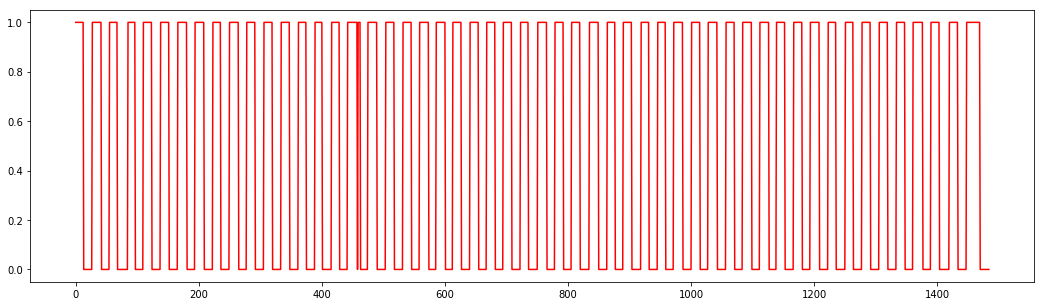

In [24]:
plt.figure(figsize=(18, 5))
plt.plot([i[0] for i in test_y[0]], 'r')
plt.show()

In [25]:
NUM_LAYERS=2

def LstmCell():
#     lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_hidden, state_is_tuple=True)
    lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_hidden)#, forget_bias=1.0)
    cell = tf.contrib.rnn.DropoutWrapper(lstm_cell, output_keep_prob=0.5)
    return cell

graph = tf.Graph()
with graph.as_default(), tf.device('/gpu:0'):
    # tf Graph input
    X = tf.placeholder("float", [None, timesteps, num_input])
    Y = tf.placeholder("float", [None, num_output])
    
    # Define weights
    weights = {
        'out': tf.Variable(tf.random_normal([num_hidden, num_output]))
    }
    biases = {
        'out': tf.Variable(tf.random_normal([num_output]))
        #'out':tf.Variable(tf.zeros([1]))
    }
    
    def RNN(x, weights, biases):
        x = tf.unstack(x, timesteps, 1)
        
#         cell = tf.contrib.rnn.MultiRNNCell([cell] * 2)
        cell = tf.contrib.rnn.MultiRNNCell([LstmCell() for _ in range(NUM_LAYERS)])
        outputs, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
        outputs = tf.transpose(outputs, [1,0,2])

        return tf.matmul(outputs[-1], weights['out']) + biases['out']
    

    logits = RNN(X, weights, biases)
    mean_train = tf.reduce_mean(X)
    loss = tf.reduce_mean(tf.squared_difference(logits, Y))
    #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)
    
    saver = tf.train.Saver()

In [26]:
batch_size = 256
batch_start = 0;
train_length = len(train_x)
print(train_length)

train_x_extend = [i for i in train_x]
train_y_extend = [i for i in train_y]

print(len(train_x_extend))

101426
101426


In [27]:
if(len(train_x_extend)==len(train_x)):
    train_x_extend.extend(train_x[0:batch_size])
    train_y_extend.extend(train_y[0:batch_size])
print(len(train_x_extend))

101682


In [28]:
def cal_accuarcy(y, _y):
    count = 0
    for i in range(0, len(y)):
        if(y[i][0] == round(_y[i][0])):
            count += 1;
    return count*1.0/len(y)
#     print("train accuarcy : ", count/len(y))

In [32]:
training_steps = 6001

config = tf.ConfigProto(allow_soft_placement=True)
# config.gpu_options.allocator_type = 'BFC'
# config.gpu_options.per_process_gpu_memory_fraction = 0.40
with tf.Session(graph=graph, config=config) as session:
#     saver.restore(session, tf.train.latest_checkpoint('lstm_check'))
#     saver.restore(session, "lstm_check/my-model-gpu-error-metric-dropout2.ckpt-6000")
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(training_steps):      
        feed_dict = {X: train_x[batch_start:batch_start+batch_size], Y: train_y[batch_start:batch_start+batch_size]}
        _, l, predictions, m = session.run([optimizer, loss, logits, mean_train], feed_dict = feed_dict)
        if (step % 200 == 0):
            train_accuarcy = cal_accuarcy(train_y[batch_start:batch_start+batch_size], predictions)
            print('Loss at step %d: %f, train accuarcy : %f' % (step, l, train_accuarcy))
            #train accuarcy
        if (step % 1000 == 0):
            saver.save(session, 'lstm_check/my-model-gpu-error-metric-dropout2-na-s.ckpt', global_step=step)
        batch_start += batch_size
        if(batch_start>=train_length):
            batch_start -=train_length
#     train_loss, train_logits = session.run([loss,logits], feed_dict={X: train_x, Y: train_y})
#     test_loss, test_logits = session.run([loss,logits], feed_dict={X: test_x, Y: test_y})
    test_loss, test_logits = [], []
    for i in range(len(test_x)):
        test_loss_part, test_logits_part = session.run([loss,logits], feed_dict={X: test_x[i], Y: test_y[i]})
        test_loss.append(test_loss_part)
        test_logits.append(test_logits_part)

Initialized
Loss at step 0: 0.968185, train accuarcy : 0.402344
Loss at step 200: 0.101251, train accuarcy : 0.878906
Loss at step 400: 0.095413, train accuarcy : 0.898438
Loss at step 600: 0.109681, train accuarcy : 0.871094
Loss at step 800: 0.080791, train accuarcy : 0.910156
Loss at step 1000: 0.064595, train accuarcy : 0.921875
Loss at step 1200: 0.073186, train accuarcy : 0.917969
Loss at step 1400: 0.063897, train accuarcy : 0.945312
Loss at step 1600: 0.072038, train accuarcy : 0.921875
Loss at step 1800: 0.056540, train accuarcy : 0.921875
Loss at step 2000: 0.045746, train accuarcy : 0.949219
Loss at step 2200: 0.056240, train accuarcy : 0.933594
Loss at step 2400: 0.048173, train accuarcy : 0.933594
Loss at step 2600: 0.044214, train accuarcy : 0.937500
Loss at step 2800: 0.047313, train accuarcy : 0.925781
Loss at step 3000: 0.058411, train accuarcy : 0.925781
Loss at step 3200: 0.048295, train accuarcy : 0.933594
Loss at step 3400: 0.061475, train accuarcy : 0.925781
Loss 

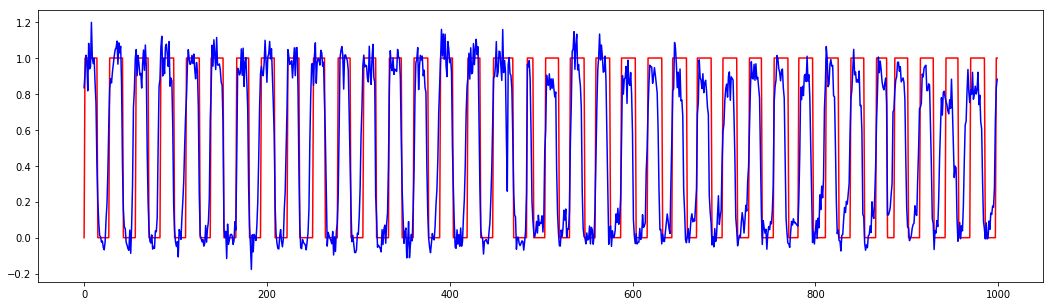

In [189]:
plt.figure(figsize=(18, 5))
start=1000
end=2000
plt.plot([i[0] for i in test_y[start:end]], 'r')
plt.plot([i[0] for i in test_logits[start:end]], 'b')
plt.show()

In [33]:
print("test loss : ", test_loss)

test loss :  [0.047814429, 0.10623716, 0.07105837, 0.10710837, 0.079585828, 0.040248949, 0.084340461, 0.075925186, 0.099149927, 0.082309037]


In [36]:
print("test loss : ", test_loss)

test_logits_bin = []
for t in test_logits:
    test_logits_part = [[round(i[0])] for i in t]
    for i in range(1, len(test_logits_part)-1):
        if(test_logits_part[i-1][0]!=test_logits_part[i][0] and test_logits_part[i-1][0]==test_logits_part[i+1][0]):
            test_logits_part[i][0]=test_logits_part[i-1][0]    
    test_logits_bin.append(test_logits_part)

count = 0
total = 0
for i in range(0, len(test_x)):
    total += len(test_y[i])
    for j in range(0, len(test_y[i])):
        if(test_y[i][j][0] == test_logits_bin[i][j][0]):
            count += 1

print(count)
print(total)
print("test accuarcy : ", count*1.0/total)

test loss :  [0.047814429, 0.10623716, 0.07105837, 0.10710837, 0.079585828, 0.040248949, 0.084340461, 0.075925186, 0.099149927, 0.082309037]
17672
19726
test accuarcy :  0.8958734664909257


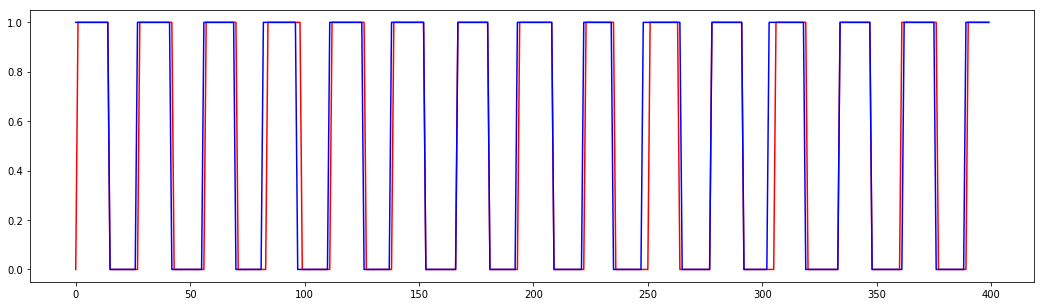

In [39]:
plt.figure(figsize=(18, 5))
start=1000
end=1400
plt.plot([i[0] for i in test_y[0][start:end]], 'r')
plt.plot([i[0] for i in test_logits_bin[0][start:end]], 'b')
plt.show()

In [48]:
#test_y      [[0], [0], [1]]
#test_logits 

step_time_actual, step_time_predict= [], []

for i in range(0, len(test_x)):
    step_time_actual_part, step_time_predict_part= [], []
    for j in range(0, len(test_y[i])-1):
        if(abs(test_y[i][j][0]-test_y[i][j-1][0])>0.5):
            step_time_actual_part.append(j)
    #     if(abs(test_logits[i][0]-test_logits[i-1][0])>0.5):
        if(abs(test_logits_bin[i][j][0]-test_logits_bin[i][j-1][0])>0.5):
            step_time_predict_part.append(j)
    step_time_actual.append(step_time_actual_part)
    step_time_predict.append(step_time_predict_part)



# for i in range(1, len(test_y)-1):
#     if(abs(test_y[i][0]-test_y[i-1][0])>0.5):
#         step_time_actual.append(i)
# #     if(abs(test_logits[i][0]-test_logits[i-1][0])>0.5):
#     if(abs(test_logits_int[i][0]-test_logits_int[i-1][0])>0.5):
#         step_time_predict.append(i)

print([len(i) for i in step_time_actual])   
print([len(i) for i in step_time_predict])

[108, 90, 148, 174, 166, 108, 90, 148, 174, 166]
[108, 92, 148, 176, 166, 108, 90, 148, 174, 167]


In [49]:
print(step_time_actual[0])
print(step_time_predict[0])

[0, 13, 27, 42, 55, 68, 85, 97, 110, 124, 138, 152, 166, 181, 194, 209, 223, 236, 250, 265, 278, 292, 306, 320, 334, 348, 362, 375, 389, 401, 416, 429, 442, 458, 459, 463, 475, 490, 504, 518, 532, 546, 559, 574, 586, 601, 613, 627, 641, 655, 668, 682, 695, 709, 723, 736, 751, 766, 779, 793, 806, 820, 835, 850, 864, 877, 890, 904, 919, 932, 946, 959, 972, 987, 1001, 1015, 1028, 1043, 1057, 1071, 1084, 1099, 1112, 1127, 1139, 1153, 1167, 1181, 1194, 1209, 1223, 1236, 1251, 1264, 1278, 1292, 1306, 1320, 1334, 1348, 1361, 1377, 1390, 1404, 1420, 1434, 1448, 1470]
[0, 13, 27, 40, 55, 69, 83, 96, 110, 124, 136, 152, 165, 180, 192, 208, 222, 237, 251, 265, 278, 292, 305, 320, 333, 348, 360, 375, 386, 402, 414, 428, 442, 456, 459, 461, 474, 489, 504, 518, 531, 546, 559, 573, 586, 601, 613, 627, 641, 654, 668, 682, 694, 709, 723, 737, 749, 765, 777, 793, 807, 821, 833, 848, 863, 877, 891, 905, 917, 932, 943, 959, 971, 986, 999, 1015, 1027, 1042, 1056, 1070, 1082, 1097, 1111, 1126, 1138, 1153, 1

In [63]:
total_step_count = sum([len(i) for i in step_time_actual])
metric1_undercount = 0
metric2_undercount = 0
metric1_overcount = 0
metric2_overcount = 0

for i in range(len(test_x)):
    step_count = len(step_time_actual[i])
    undercount = 0
    overcount = 0

    for j in range(1, step_count):
        gap_count = [t for t in step_time_predict[i] if t>=step_time_actual[i][j-1] and t<step_time_actual[i][j]]
    #     print(gap_count)
        if(len(gap_count)>1):
            overcount += len(gap_count)-1
        if(len(gap_count)<1):
            undercount += 1
    
    metric1_undercount += undercount
    metric1_overcount += overcount
    print(undercount, overcount)
    print('undercount : ', undercount*1.0/step_count)
    print('overcount : ', overcount*1.0/step_count)
    diff = len(step_time_predict[i])-len(step_time_actual[i])
    if(diff==0):
        print("segement correct!")
    else:
        if(diff<0):
            print('segement undercount : ', 1-len(step_time_predict[i])*1.0/len(step_time_actual[i]))
            metric2_undercount += diff
        else:
            print('segement overcount : ', 1-len(step_time_actual[i])*1.0/len(step_time_predict[i]))
            metric2_overcount += diff

print('------------------')
print("total undercount metric 1 : ", metric1_undercount*1.0/total_step_count)
print("total overcount metric 1 : ", metric1_overcount*1.0/total_step_count)
print("total undercount metric 2 : ", metric2_undercount*1.0/total_step_count)
print("total overcount metric 2 : ", metric2_overcount*1.0/total_step_count)

26 26
undercount :  0.24074074074074073
overcount :  0.24074074074074073
segement correct!
38 38
undercount :  0.4222222222222222
overcount :  0.4222222222222222
segement overcount :  0.021739130434782594
17 17
undercount :  0.11486486486486487
overcount :  0.11486486486486487
segement correct!
2 4
undercount :  0.011494252873563218
overcount :  0.022988505747126436
segement overcount :  0.011363636363636354
57 58
undercount :  0.3433734939759036
overcount :  0.3493975903614458
segement correct!
24 24
undercount :  0.2222222222222222
overcount :  0.2222222222222222
segement correct!
37 37
undercount :  0.4111111111111111
overcount :  0.4111111111111111
segement correct!
4 4
undercount :  0.02702702702702703
overcount :  0.02702702702702703
segement correct!
0 0
undercount :  0.0
overcount :  0.0
segement correct!
58 59
undercount :  0.3493975903614458
overcount :  0.35542168674698793
segement overcount :  0.005988023952095856
------------------
total undercount metric 1 :  0.1916909620